# Held Karp TP

In [4]:
import networkx as nx
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from itertools import combinations

from reader_students import file_to_graph

# Define fonction

In [5]:
def plot_graph(g):
    fig, ax = plt.subplots(figsize=(25, 6))
    ax.set_axis_off()
    ax.set_aspect(1)
    pos = nx.shell_layout(g)
    labels = nx.get_edge_attributes(g, 'weight')
    # print(labels)

    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels, ax=ax)
    nx.draw_networkx(g, ax=ax, node_size=800, arrowsize=20, pos=pos)

In [1]:
def norm(x, min, max):
    return (x-min)/(min-max)

def pos_from_points(points):
    pos = dict()
    xmin = min([point.x for point in points])
    xmax = max([point.x for point in points])
    ymin = min([point.y for point in points])
    ymax = max([point.y for point in points])
    # print(f"{xmin=},{xmax=},{ymin=},{ymax=}")

    for index, point in enumerate(points):
        pos[index] = [norm(point.x, xmin, xmax), norm(point.y, ymin, ymax)]
    
    return pos

def trunc_dict(D):
        for k, v in D.items():
            D[k] = v.__trunc__()
        return D

def plot_cities(g, points):
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.set_axis_off()
    ax.set_aspect(1)
    pos = pos_from_points(points)
    labels = trunc_dict(nx.get_edge_attributes(g, 'weight'))

    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels, ax=ax)
    nx.draw_networkx(g, ax=ax, node_size=600, arrowsize=20, pos=pos)

In [2]:
def creer_cle(liste,k):
    return(str(sorted(liste)).replace('[','').replace(']','')+"_"+str(k))

In [9]:
def Held_karp(graph):
    L = {}
    list_node = list(graph.nodes)
    list_node_without1 = list(graph.nodes)
    del list_node_without1[0]
    n = len(list_node)
    
    for i in range(2,n+1):
        key = str(list_node[i-1])+"_"+str(list_node[i-1])
        L[key] = graph.edges[list_node[0],list_node[i-1]]["weight"]
        
    for m in range(2,n):
        for S in combinations(list_node_without1,m):
            for j in S:
                u = list()
                list_set = list(S)
                list_set.remove(j)
                for k in list_set:
                    # if k!=j:
                    key = creer_cle(list_set,k)
                    u.append(graph.edges[k,j]["weight"] + L[key])
                key = creer_cle(list(S),j)
                L[key] = min(u)
    return(min(L[creer_cle(list_node_without1,j)]+graph.edges[list_node[0],j]["weight"] for j in list_node_without1))

## Graph plotting and time calculation

### For 5 cities

In [35]:
%%time
graph5 = file_to_graph('data/tsp5.txt')
Held_karp(graph5[0])


Extracting graph from data/tsp5.txt ...
Found: 5 points
Points: 
[Point(20833.3,17100.0), Point(20900.0,17066.7), Point(21300.0,13016.7), Point(21600.0,14150.0), Point(21600.0,14966.7)]

CPU times: user 3.35 ms, sys: 27 µs, total: 3.37 ms
Wall time: 2.42 ms


8387.077130278542

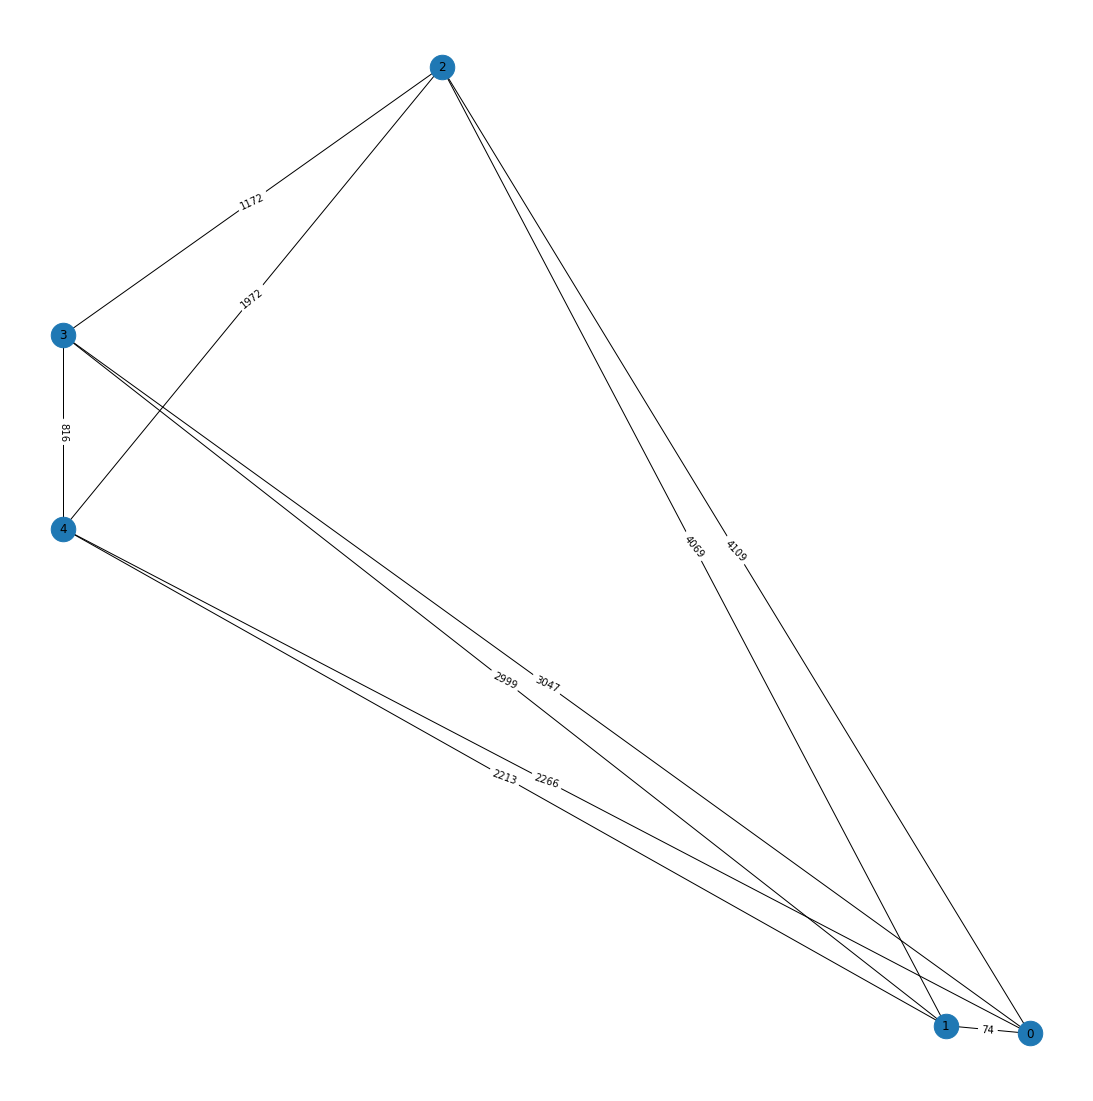

In [36]:
plot_cities(graph5[0], graph5[1])

### With 10 cities

In [42]:
%%time
graph10 = file_to_graph('data/tsp10.txt')
Held_karp(graph10[0])


Extracting graph from data/tsp10.txt ...
Found: 10 points
Points: 
[Point(20833.3,17100.0), Point(20900.0,17066.7), Point(21300.0,13016.7), Point(21600.0,14150.0), Point(21600.0,14966.7), Point(21600.0,16500.0), Point(22183.3,13133.3), Point(22583.3,14300.0), Point(22683.3,12716.7), Point(23616.7,15866.7)]

CPU times: user 40.5 ms, sys: 7.97 ms, total: 48.5 ms
Wall time: 47.6 ms


12349.980743996226

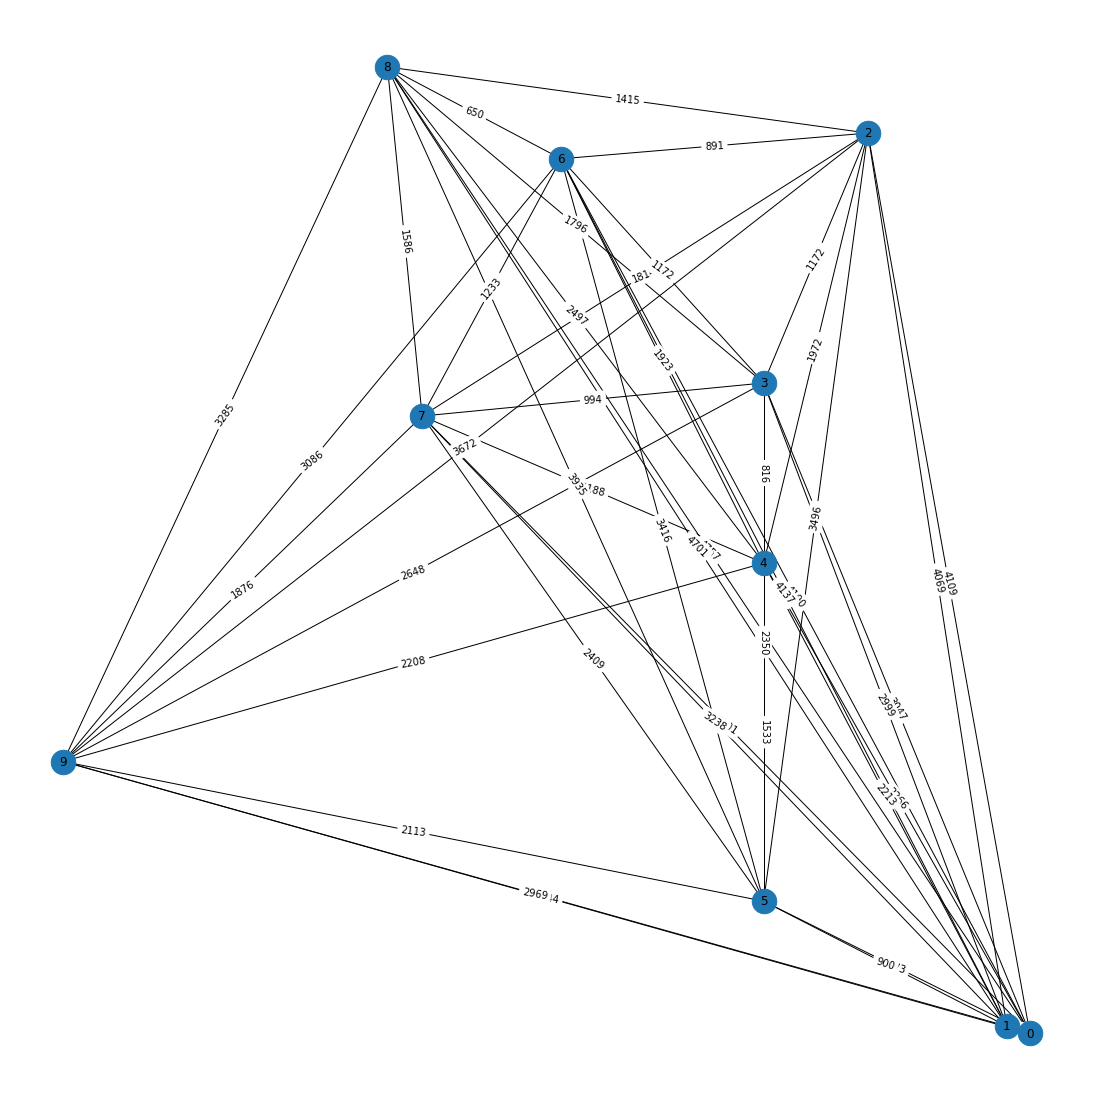

In [43]:
plot_cities(graph10[0], graph10[1])

### With 15 cities

In [13]:
%%time
graph15 = file_to_graph('data/tsp15.txt')
Held_karp(graph15[0])


Extracting graph from data/tsp15.txt ...
Found: 15 points
Points: 
[Point(20833.3,17100.0), Point(20900.0,17066.7), Point(21300.0,13016.7), Point(21600.0,14150.0), Point(21600.0,14966.7), Point(21600.0,16500.0), Point(22183.3,13133.3), Point(22583.3,14300.0), Point(22683.3,12716.7), Point(23616.7,15866.7), Point(23700.0,15933.3), Point(23883.3,14533.3), Point(24166.7,13250.0), Point(25149.2,12365.8), Point(26133.3,14500.0)]

CPU times: user 2.89 s, sys: 18.2 ms, total: 2.9 s
Wall time: 2.91 s


19269.93599779425

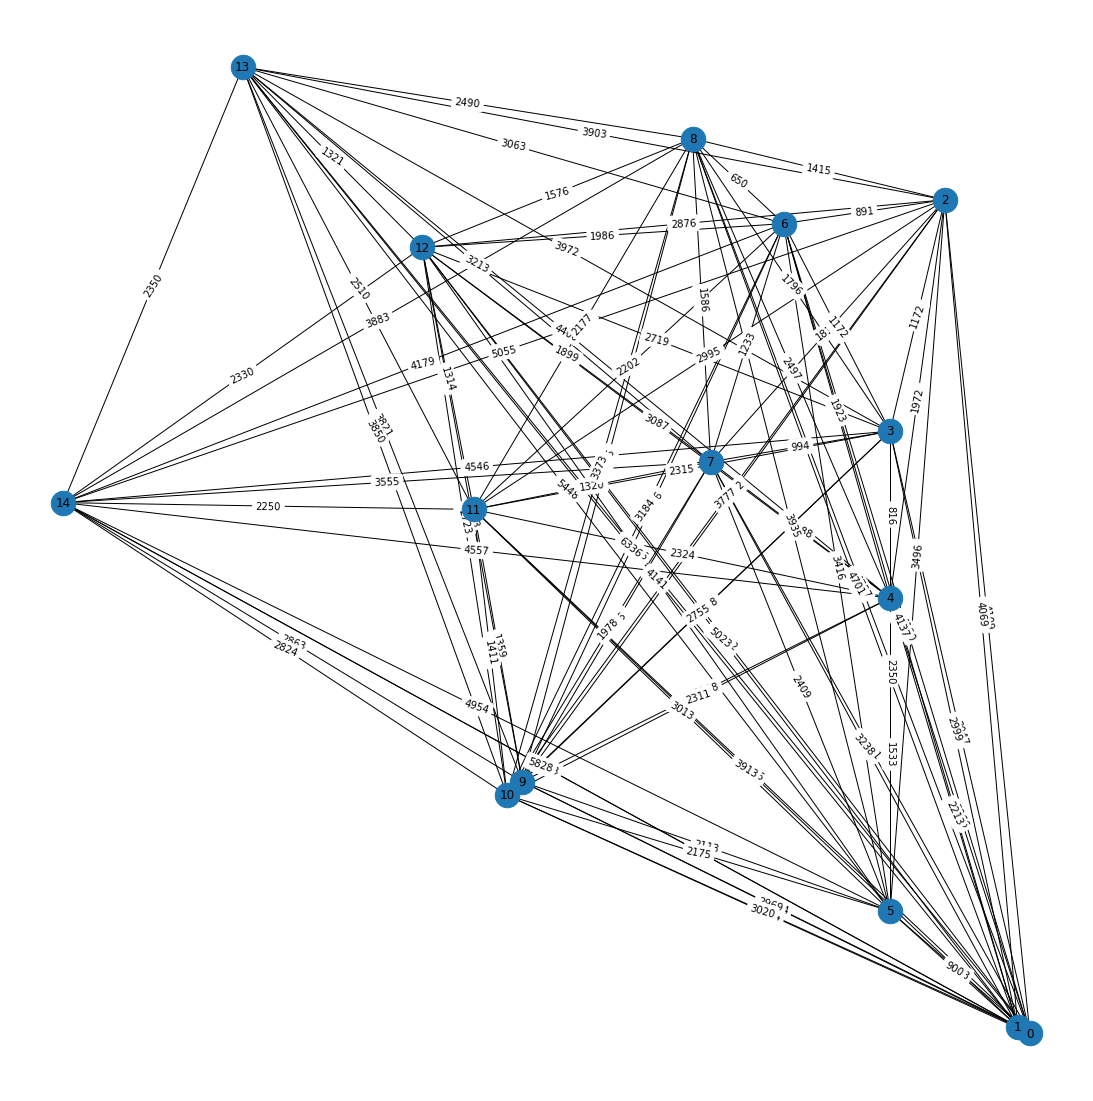

In [45]:
plot_cities(graph15[0], graph15[1])

### With 20 cities

In [47]:
%%time
graph20 = file_to_graph('data/tsp20.txt')
Held_karp(graph20[0])


Extracting graph from data/tsp20.txt ...
Found: 20 points
Points: 
[Point(20833.3,17100.0), Point(20900.0,17066.7), Point(21300.0,13016.7), Point(21600.0,14150.0), Point(21600.0,14966.7), Point(21600.0,16500.0), Point(22183.3,13133.3), Point(22583.3,14300.0), Point(22683.3,12716.7), Point(23616.7,15866.7), Point(23700.0,15933.3), Point(23883.3,14533.3), Point(24166.7,13250.0), Point(25149.2,12365.8), Point(26133.3,14500.0), Point(26150.0,10550.0), Point(26283.3,12766.7), Point(26433.3,13433.3), Point(26550.0,13850.0), Point(26733.3,11683.3)]

CPU times: user 2min, sys: 820 ms, total: 2min 1s
Wall time: 2min 2s


23328.990366914215

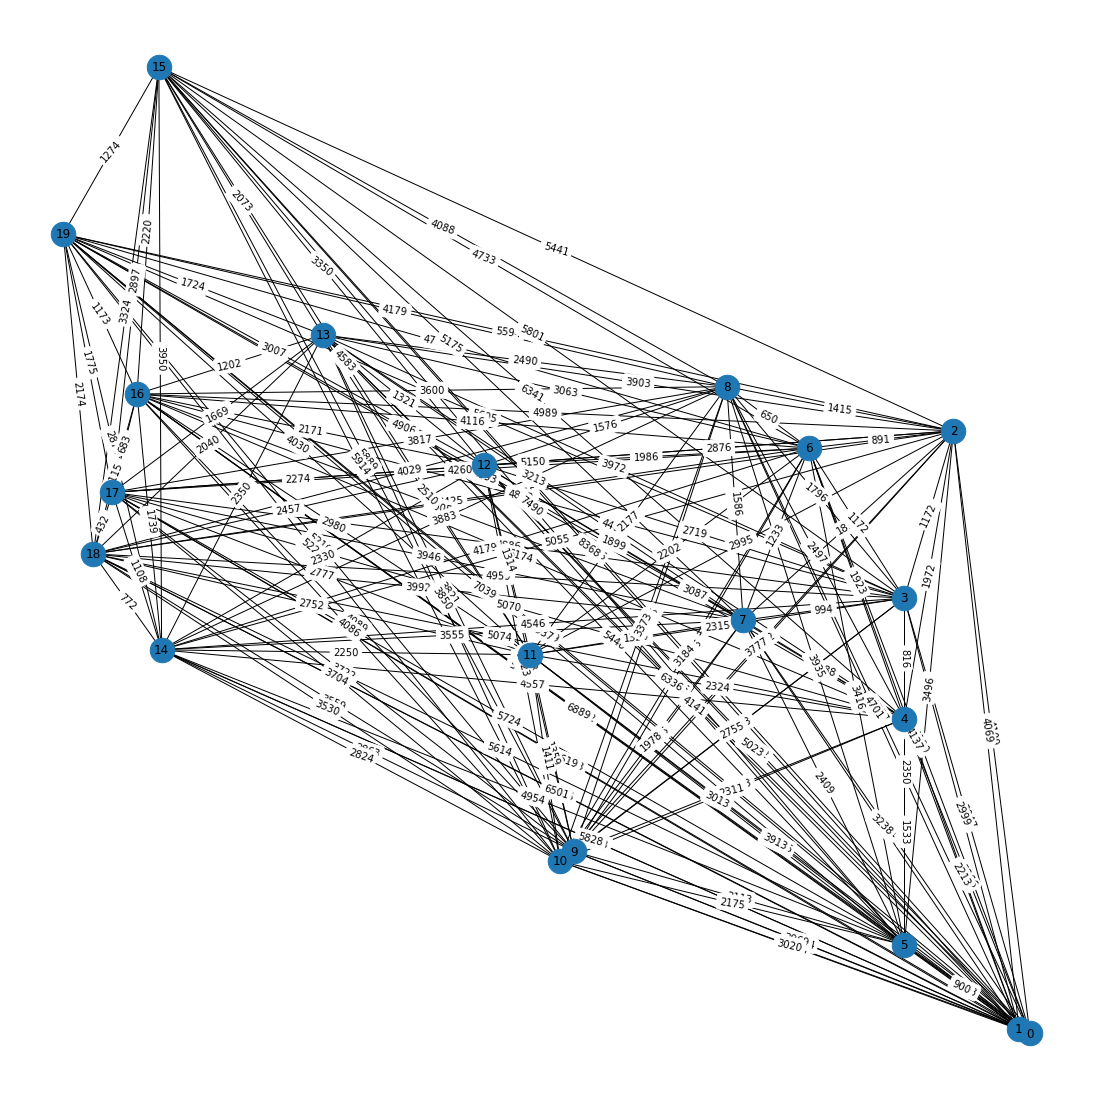

In [48]:
plot_cities(graph20[0], graph20[1])